#  CLASSIFICATION - INCOME >50K  PREDICTION


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

# I.	Data Collection 

1) Load the ‘census.data.txt’ dataset. I am identified the number of rows and columns on on the data set


In [4]:

census = pd.read_csv('census.txt') 
census.shape



(48841, 15)

2)	I am assigning the following names to the columns of the census dataframe
#age, workclass, fnlwgt, education, education-num, marital, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country, income>50K

In [3]:

names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
census.columns = names
census.head(10)

,age,workclass,fnlwgt,education,education-num,marital,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


# II.	Preliminary Data Exploration & Preparation

3)	How many categories of attributes are there? List column names by the type (categorical, numeric)
-	There are 9 possible categories in the data set

In [4]:
print(census.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48841 entries, 0 to 48840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48841 non-null  int64 
 1   workclass       48841 non-null  object
 2   fnlwgt          48841 non-null  int64 
 3   education       48841 non-null  object
 4   education-num   48841 non-null  int64 
 5   marital         48841 non-null  object
 6   occupation      48841 non-null  object
 7   relationship    48841 non-null  object
 8   race            48841 non-null  object
 9   sex             48841 non-null  object
 10  capital-gain    48841 non-null  int64 
 11  capital-loss    48841 non-null  int64 
 12  hours-per-week  48841 non-null  int64 
 13  native-country  48841 non-null  object
 14  income          48841 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None


4)	Are there any missing values in the data set? If so, identify which columns have missing values and how many missing values
- There are no missing values

In [5]:

census.isnull().sum() 

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital           0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

5)	Are there any duplicates, outliers and any inconsistencies? Remove duplicates and inconsistencies if present?

In [6]:
#a) Duplicates
duplicates = census[census.duplicated()]
print (duplicates)


       age          workclass  fnlwgt      education  education-num  \
4880    25            Private  308144      Bachelors             13   
5103    90            Private   52386   Some-college             10   
9170    21            Private  250051   Some-college             10   
11630   20            Private  107658   Some-college             10   
13083   25            Private  195994        1st-4th              2   
15058   21            Private  243368      Preschool              1   
17039   46            Private  173243        HS-grad              9   
18554   30            Private  144593        HS-grad              9   
18697   19            Private   97261        HS-grad              9   
21317   19            Private  138153   Some-college             10   
21489   19            Private  146679   Some-college             10   
21874   49            Private   31267        7th-8th              4   
22299   25            Private  195994        1st-4th              2   
22366 

In [7]:
#b) Remove duplicates
census.drop_duplicates(subset=None, keep='first', inplace=True)


In [8]:
census.shape

(48789, 15)

In [9]:
#c) Identifying if there is data types Inconsistencies
print(census.dtypes)
print(census.head(3))

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital           object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object
   age          workclass  fnlwgt   education  education-num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   

               marital          occupation    relationship    race    sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White   Male   
1             Divorced   Handlers-cleaners   Not-in-family   White   Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black   Male   

   capital-gain  capital-loss  hours-per-week

In [10]:
#I am trying to convert all the int64 values to numeric and counting how many values are converted. The output shows there's none converted therefore I can say there's no dats typ inconsistency in these columns 
print(pd.to_numeric(census['age'], errors='coerce').isnull().value_counts())
print(pd.to_numeric(census['fnlwgt'], errors='coerce').isnull().value_counts())
print(pd.to_numeric(census['education-num'], errors='coerce').isnull().value_counts())
print(pd.to_numeric(census['capital-gain'], errors='coerce').isnull().value_counts())
print(pd.to_numeric(census['capital-loss'], errors='coerce').isnull().value_counts())
print(pd.to_numeric(census['hours-per-week'], errors='coerce').isnull().value_counts())



False    48789
Name: age, dtype: int64
False    48789
Name: fnlwgt, dtype: int64
False    48789
Name: education-num, dtype: int64
False    48789
Name: capital-gain, dtype: int64
False    48789
Name: capital-loss, dtype: int64
False    48789
Name: hours-per-week, dtype: int64


In [11]:
#changed age and hours_per_week data types to float to give the values more precision
census.age = census.age.astype(float)
census['hours-per-week'] = census['hours-per-week'].astype(float)
print(census.dtypes)


age               float64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital            object
occupation         object
relationship       object
race               object
sex                object
capital-gain        int64
capital-loss        int64
hours-per-week    float64
native-country     object
income             object
dtype: object


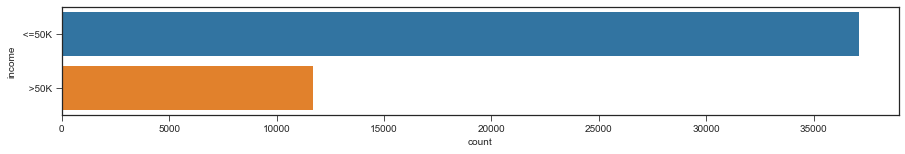

In [12]:
# 7)	Perform descriptive and exploratory analytics
#The data has more records of income level <50k

fig = plt.figure(figsize=(15,2))
plt.style.use('seaborn-ticks')
sns.countplot(y="income", data=census)

In [13]:

#Analyzing education and education_num attributes 

census[['education', 'education-num']].groupby(['education'], as_index=False).mean().sort_values(by='education-num', ascending=False)

,education,education-num
10,Doctorate,16
14,Prof-school,15
12,Masters,14
9,Bachelors,13
7,Assoc-acdm,12
8,Assoc-voc,11
15,Some-college,10
11,HS-grad,9
2,12th,8
1,11th,7


In [14]:
# Cleaning up education attribute to better categorize the values for simpler visualization/analysis
census['education']=census['education'].replace('Preschool', 'dropout',regex=True)
census['education']=census['education'].replace('10th', 'dropout',regex=True)
census['education']=census['education'].replace('11th', 'dropout',regex=True)
census['education']=census['education'].replace('12th', 'dropout',regex=True)
census['education']=census['education'].replace('1st-4th', 'dropout',regex=True)
census['education']=census['education'].replace('5th-6th', 'dropout',regex=True)
census['education']=census['education'].replace('7th-8th', 'dropout',regex=True)
census['education']=census['education'].replace('9th', 'dropout',regex=True)
census['education']=census['education'].replace('HS-grad', 'HighSchool-Grad',regex=True)
census['education']=census['education'].replace('Some-college', 'CommunityCollege',regex=True)
census['education']=census['education'].replace('Assoc-acdm', 'CommunityCollege',regex=True)
census['education']=census['education'].replace('Assoc-voc', 'CommunityCollege',regex=True)
census['education']=census['education'].replace('Bachelors', 'Bachelors',regex=True)
census['education']=census['education'].replace('Masters', 'Masters',regex=True)
census['education']=census['education'].replace('Prof-school', 'Masters',regex=True)
census['education']=census['education'].replace('Doctorate', 'Doctorate',regex=True)


In [15]:
census[['education', 'education-num']].groupby(['education'], as_index=False).mean().sort_values(by='education-num', ascending=False)

,education,education-num
2,Doctorate,16.000000
4,Masters,14.238968
0,Bachelors,13.000000
1,CommunityCollege,10.362297
3,HighSchool-Grad,9.000000
5,dropout,5.617440


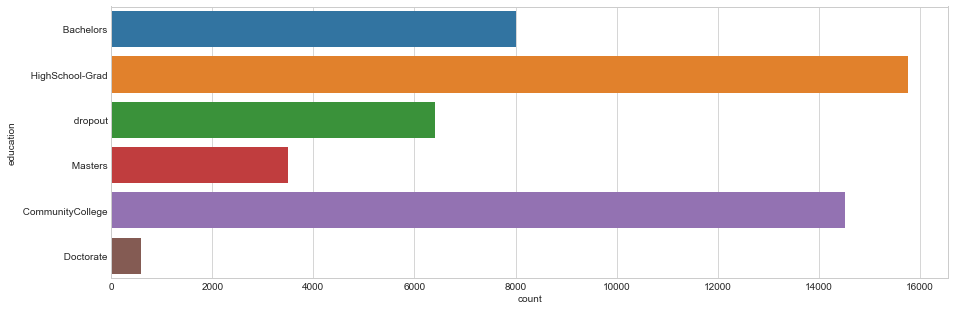

In [16]:
# a)	Which educational group seems to have the highest proportion of people making greater than 50K?

fig = plt.figure(figsize=(15,5))
plt.style.use('seaborn-whitegrid')

# x, y, hue = "education", "prop", "income"
sns.countplot(y="education", data=census)


# plt.subplot(1, 2, 2)
# sns.distplot(census['education']);
# sns.distplot(census[census['income'] == '>50K']['education'], kde_kws={"income": ">$50K"})
# sns.distplot(census[census['income'] == '<=50K']['education'], kde_kws={"income": "<$50K"})
# plt.ylim(0, None)
# plt.xlim(20, 60)

a)	Which educational group seems to have the highest proportion of people making greater than 50K?
-  Bachelors education seems to have highest proportion of people making greater than 50K

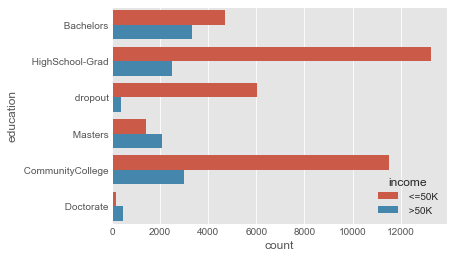

In [17]:

plt.style.use('ggplot')
sns.countplot(y='education', hue='income', data = census)


b)	Which occupation seems to have the highest proportion of people making greater than 50K?

- Exec-managerial

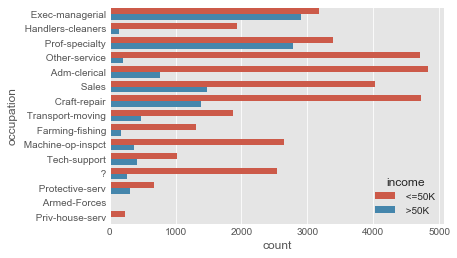

In [18]:

plt.style.use('ggplot')
sns.countplot(y='occupation', hue='income', data = census)


c)	What about the effect of gender in earning income greater than 50K?
- Gender has an effect. Male seems to have more proportion of people earning >50K

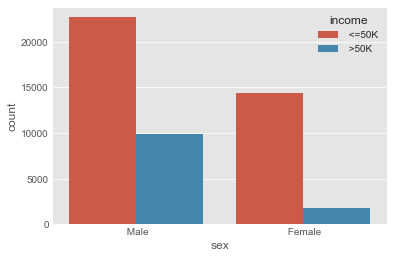

In [19]:

plt.style.use('ggplot')
sns.countplot(x='sex', hue='income', data = census)


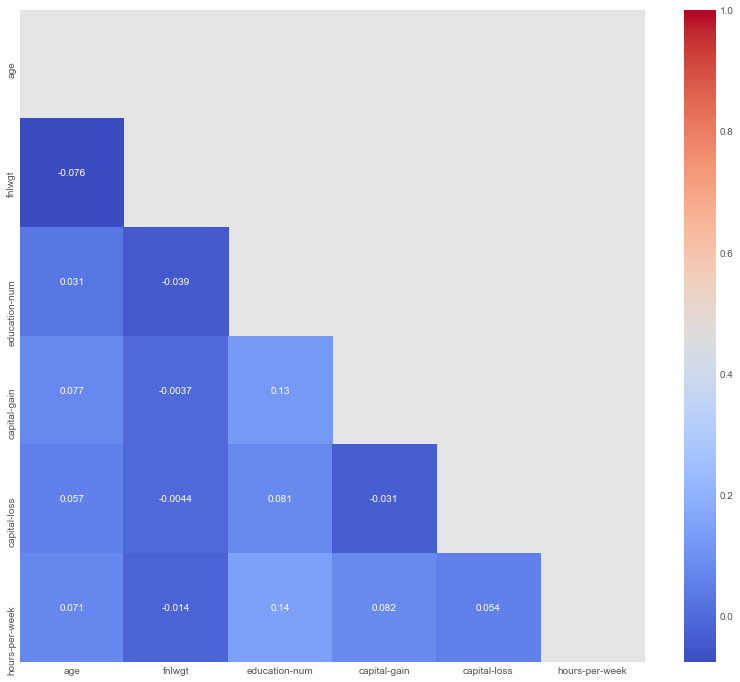

In [20]:
# d)	Overall which variable or variables seem to have stronger relationship with the target variable (income>50K)?

corm = census.iloc[:,:-1].corr()
masko = np.zeros_like(corm, dtype = np.bool)
masko[np.triu_indices_from(masko)] = True

fig, ax = plt.subplots(figsize = (14,12))
sns.heatmap(corm, mask = masko, cmap = 'coolwarm', annot=True)

In [21]:
# 8)	Are there any attributes which may not be important for the prediction of target variable, based on the preliminary descriptive analytics? 
#Maybe 'fnlwgt’ not so much significance in doing the analysis


# III.	Fitting  ML Model


 (Hint: some of the attributes in the dataset are categorical. If you need to convert them into numeric values use pd.get_dummies method)

In [22]:
# converting 'income' to numerical 
census['income']=census['income'].replace('>50', 1,regex=True)
census['income']=census['income'].replace('<=50', 0,regex=True)


In [23]:
census_d=pd.get_dummies(census, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None) 
census_d.head(3)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,50.0,83311,13,0,0,13.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38.0,215646,9,0,0,40.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,53.0,234721,7,0,0,40.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [24]:
#seprating the target variable 'income' from all the independent variables
X = census_d.loc[:,census_d.columns != 'income']
X.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,50.0,83311,13,0,0,13.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38.0,215646,9,0,0,40.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,53.0,234721,7,0,0,40.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,28.0,338409,13,0,0,40.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37.0,284582,14,0,0,40.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
y = census_d.loc[:,'income']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)

In [28]:
# Dummy Classifier

In [29]:
# 9)	Start with a dummy classifier to establish the base line metrics. With random_state=0, and most frequent strategy, what is the baseline accuracy for dummy classifier?

from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, accuracy_score,f1_score

dummy = DummyClassifier(strategy = 'most_frequent', random_state=0)
dummy.fit(X_train, y_train)

ydummy_train = dummy.predict(X_train)
ydummy_train[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [30]:
ydummy_test = dummy.predict(X_test)
print ('Confusion matrix for DummyClassifier is : \n \n', confusion_matrix(y_test,ydummy_test))

Confusion matrix for DummyClassifier is : 
 
 [[9239    0]
 [2959    0]]


In [31]:
# baseline accuracy for dummy classifier is 75%
print ('Accuracy score for DummyClassifier is : \n \n', accuracy_score(y_test, ydummy_test))

Accuracy score for DummyClassifier is : 
 
 0.7574192490572225


10)	Start with any classification model and fit it on training data and then make predictions on the test data (the goal is to get good predictive accuracy on test data). Look at different metrics (accuracy, precision, recall, f1-score, and AUC scores).



# Logistics Regression



Training, Predictions, Confusion matrix, & scores

In [32]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(random_state=10)
logr.fit(X_train, y_train)

ypred_train_logr = logr.predict(X_train)
ypred_test_logr = logr.predict(X_test)

print ('confusion matrix for training data is : \n', confusion_matrix(y_train,ypred_train_logr), '\n', '\n')
print ('confusion_matrix for test data is : \n', confusion_matrix(y_test,ypred_test_logr), '\n')


confusion matrix for training data is : 
 [[26970   899]
 [ 6482  2240]] 
 

confusion_matrix for test data is : 
 [[8958  281]
 [2223  736]] 



# Accuracy, Recall & Precision on training data

In [33]:
print ('Accuracy for train data is : \n', accuracy_score(y_train,ypred_train_logr), '\n')
print ('Recall for train data is : \n', recall_score(y_train,ypred_train_logr), '\n')
print ('Precision for train data is : \n', precision_score(y_train,ypred_train_logr), '\n')
print ('f1-score for train data is : \n', f1_score(y_train,ypred_train_logr), '\n')

Accuracy for train data is : 
 0.7982837309720969 

Recall for train data is : 
 0.2568218298555377 

Precision for train data is : 
 0.7136030582988213 

f1-score for train data is : 
 0.37770845628530475 



# Accuracy, Recall & Precision on test data

In [34]:
print ('Accuracy for test data is : \n', accuracy_score(y_test,ypred_test_logr), '\n')
print ('Recall for test data is : \n', recall_score(y_test,ypred_test_logr), '\n')
print ('Precision for test data is : \n', precision_score(y_test,ypred_test_logr), '\n')
print ('f1-score for test data is : \n', f1_score(y_test,ypred_test_logr), '\n')

Accuracy for test data is : 
 0.79472044597475 

Recall for test data is : 
 0.24873267995944576 

Precision for test data is : 
 0.7236971484759095 

f1-score for test data is : 
 0.3702213279678068 



# Predicting actual probabilities

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
yprob_test_logr = logr.predict_proba(X_test)

print ('AUC Score for logistic regression is', roc_auc_score(y_test,yprob_test_logr[:,1]))

AUC Score for logistic regression is 0.5691256714368294


# IV.	Optimize ML models

# Decision Trees

In [36]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=15)
dt.fit(X_train,y_train)

ypred_train_dt = dt.predict(X_train) # Predictions on training data for DecisionTreeClassifer()
ypred_test_dt = dt.predict(X_test) # Predictions on testing data for DecisionTreeClassifer()

print ('confusion matrix for training data for default threshold of 0.5  is : \n', confusion_matrix(y_train,ypred_train_dt), '\n', '\n')
print ('confusion_matrix for test data for default threshol of 0.5 is : \n', confusion_matrix(y_test,ypred_test_dt), '\n')

confusion matrix for training data for default threshold of 0.5  is : 
 [[27869     0]
 [    3  8719]] 
 

confusion_matrix for test data for default threshol of 0.5 is : 
 [[8033 1206]
 [1065 1894]] 



# Scores on test data for Decision Trees

In [37]:
yprob_test_dt = dt.predict_proba(X_test)

print ('AUC score for test data with DT is : \n', roc_auc_score(y_test,yprob_test_dt[:,1]))


AUC score for test data with DT is : 
 0.7547347939976007


# RandomForest

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train)

ypred_train_rf = rf.predict(X_train) 
ypred_test_rf = rf.predict(X_test) 

print ('confusion matrix for training data for default threshold is : \n', confusion_matrix(y_train,ypred_train_rf), '\n', '\n')
print ('confusion_matrix for test data for default threshold is : \n', confusion_matrix(y_test,ypred_test_rf), '\n')


confusion matrix for training data for default threshold is : 
 [[27867     2]
 [    2  8720]] 
 

confusion_matrix for test data for default threshold is : 
 [[8570  669]
 [1110 1849]] 



# Scores on test data for RandomForest

In [39]:
yprob_test_rf = rf.predict_proba(X_test) 

print ('AUC score for test data with RF is : \n', roc_auc_score(y_test,yprob_test_rf[:,1]))

AUC score for test data with RF is : 
 0.9046233693285085


12)	Tabulate and compare between different models in predicting the income>50K.  Which model performed the best and what were the parameters, or strategies employed?

#Random forest performed the best. I did not employ any specific strategy to it. I used all the parameters as I did on other models

# Comparing AUC scores for all the models

In [40]:
auc_score = []
auc_score.append(roc_auc_score(y_test,yprob_test_logr[:,1]))
auc_score.append(roc_auc_score(y_test,yprob_test_dt[:,1]))
auc_score.append(roc_auc_score(y_test,yprob_test_rf[:,1]))
auc_scores = pd.Series(auc_score, index = ['Logistic', 'DT', 'RF'])
auc_scores

Logistic    0.569126
DT          0.754735
RF          0.904623
dtype: float64

# SUMMARY

- The majority of the people have an income of >=50K
- Both gender and education level are significant on predictng likelihood of more than 50k per year